In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read the CSV file

my_local_path = "B:/UPX docs/Machine Learning/Project_datasets/Project datasets modified/NYC Taxi Trip/NYC Taxi Trip/"
taxi_data = pd.read_csv(my_local_path+"train.csv")
taxi_data.head(5)

In [ ]:
taxi_data.info()

In [ ]:
# Seperating the datetime stamp into two seperate columns for pickup_datetime and pickup_datetime

taxi_data['dropoff_date']=pd.to_datetime(taxi_data['dropoff_datetime']).dt.date
taxi_data['dropoff_time']=pd.to_datetime(taxi_data['dropoff_datetime']).dt.time
taxi_data['pickup_date']=pd.to_datetime(taxi_data['pickup_datetime']).dt.date
taxi_data['pickup_time']=pd.to_datetime(taxi_data['pickup_datetime']).dt.time


In [ ]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data.pickup_datetime) 

In [ ]:
taxi_data.head()

In [ ]:
#Dropping the columns, pickup_datetime and dropoff_datetime

#taxi_dropped = taxi_data.drop(columns=['dropoff_datetime','id'])


In [ ]:
taxi_mod1 = taxi_data
taxi_mod1.head()


 FINDING THE DISTANCE BETWEEN PICKUP AND DROP LOCATION USING longitude and Latitude

In [ ]:
from haversine import haversine

In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop) 

In [317]:
taxi_mod1['distance(in KM)'] = taxi_mod1.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
taxi_mod1.head()

In [64]:
taxi_mod2 = taxi_mod1

In [ ]:
taxi_mod2.head()

In [66]:
taxi_mod2['distance(in KM)'].max()
#taxi_1.to_csv('taxi_1.csv')

1240.9103901551698

In [68]:
taxi_mod2['trip_duration(in hours)']=taxi_mod2['trip_duration']/3600

In [69]:
taxi_mod2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,distance(in KM),trip_duration(in hours)
0,id2875421,2,2016-03-14 17:24:00,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:32:00,2016-03-14,17:24:00,1.498523,0.126389
1,id2377394,1,2016-12-06 00:43:00,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-12-06,00:54:00,2016-12-06,00:43:00,1.805510,0.184167
2,id3858529,2,2016-01-19 11:35:00,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,12:10:00,2016-01-19,11:35:00,6.385107,0.590000
3,id3504673,2,2016-06-04 19:32:00,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-06-04,19:39:00,2016-06-04,19:32:00,1.485501,0.119167
4,id2181028,2,2016-03-26 13:30:00,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:38:00,2016-03-26,13:30:00,1.188591,0.120833


In [286]:
taxi_mod3=taxi_mod2

In [287]:
taxi_mod3['SPEED(Km/Hr)']=taxi_mod3['distance(in KM)']/taxi_mod3['trip_duration(in hours)']


In [288]:
taxi_mod3.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,distance(in KM),trip_duration(in hours),SPEED(Km/Hr)
0,id2875421,2,2016-03-14 17:24:00,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:32:00,2016-03-14,17:24:00,1.498523,0.126389,11.856446
1,id2377394,1,2016-12-06 00:43:00,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-12-06,00:54:00,2016-12-06,00:43:00,1.805510,0.184167,9.803675
2,id3858529,2,2016-01-19 11:35:00,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,12:10:00,2016-01-19,11:35:00,6.385107,0.590000,10.822216
3,id3504673,2,2016-06-04 19:32:00,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-06-04,19:39:00,2016-06-04,19:32:00,1.485501,0.119167,12.465740
4,id2181028,2,2016-03-26 13:30:00,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:38:00,2016-03-26,13:30:00,1.188591,0.120833,9.836615


In [289]:
taxi_mod3 = taxi_mod3.drop(columns=['id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])
taxi_mod3.head()
#taxi_3.to_csv('B:/UPX docs/Machine Learning/Project_datasets/Project datasets modified/NYC Taxi Trip/NYC Taxi Trip/taxi_3.csv')

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,distance(in KM),trip_duration(in hours),SPEED(Km/Hr)
0,2,2016-03-14 17:24:00,14-03-2016 17:32,1,N,455,2016-03-14,17:32:00,2016-03-14,17:24:00,1.498523,0.126389,11.856446
1,1,2016-12-06 00:43:00,12-06-2016 00:54,1,N,663,2016-12-06,00:54:00,2016-12-06,00:43:00,1.805510,0.184167,9.803675
2,2,2016-01-19 11:35:00,19-01-2016 12:10,1,N,2124,2016-01-19,12:10:00,2016-01-19,11:35:00,6.385107,0.590000,10.822216
3,2,2016-06-04 19:32:00,06-04-2016 19:39,1,N,429,2016-06-04,19:39:00,2016-06-04,19:32:00,1.485501,0.119167,12.465740
4,2,2016-03-26 13:30:00,26-03-2016 13:38,1,N,435,2016-03-26,13:38:00,2016-03-26,13:30:00,1.188591,0.120833,9.836615


In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(taxi_mod3)
profile.to_file(outputfile="NYC_TAXI.html")

In [290]:
corr = taxi_mod3.corr()
corr

,vendor_id,passenger_count,trip_duration,distance(in KM),trip_duration(in hours),SPEED(Km/Hr)
vendor_id,1.000000,0.287602,0.017742,0.008309,0.017742,0.001565
passenger_count,0.287602,1.000000,0.007149,0.009649,0.007149,-0.001312
trip_duration,0.017742,0.007149,1.000000,0.083945,1.000000,-0.017920
distance(in KM),0.008309,0.009649,0.083945,1.000000,0.083945,0.578171
trip_duration(in hours),0.017742,0.007149,1.000000,0.083945,1.000000,-0.017920
SPEED(Km/Hr),0.001565,-0.001312,-0.017920,0.578171,-0.017920,1.000000


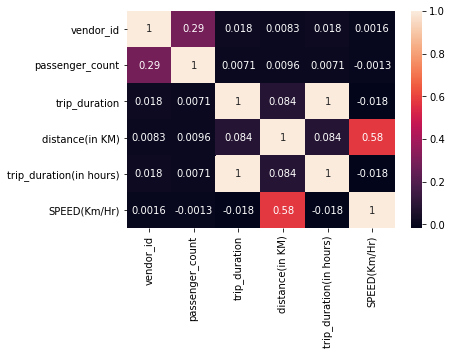

In [291]:
sns.heatmap(corr,annot=True)

From above Heat Map it is observed that there is positive correlation between Trip_duration and Distance

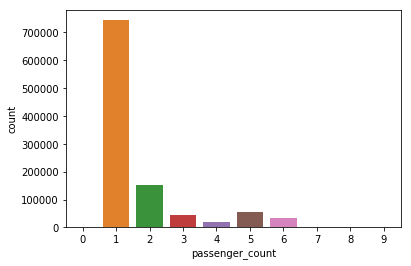

In [249]:
sns.countplot(x='passenger_count', data=taxi_mod3)

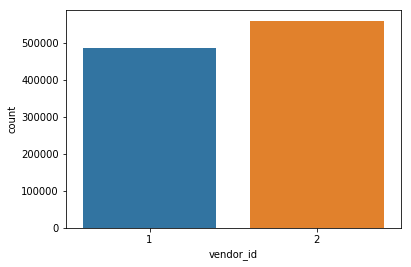

In [250]:
sns.countplot(x='vendor_id', data=taxi_mod3)

In [251]:
#taxi_3.plot(taxi_3['distance(in KM)'],taxi_3['trip_duration'])
#taxi_3.plot(kind='scatter', x='distance(in KM)', y='trip_duration(in hours)', alpha=1)

TRIP_DURATION vs Hour_of day, month_of_date, day_of_week, day_of month

In [297]:
taxi_mod3['hour_of_day']=taxi_mod3.pickup_datetime.dt.hour
taxi_mod3['month_of_date'] = taxi_mod3['pickup_datetime'].dt.month
taxi_mod3['day_of_week'] = taxi_mod3['pickup_datetime'].dt.weekday_name
taxi_mod3['day_of_month'] = taxi_mod3['pickup_datetime'].dt.day
taxi_mod3.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,distance(in KM),trip_duration(in hours),SPEED(Km/Hr),hour_of_day,month_of_date,day_of_week,day_of_month
0,2,2016-03-14 17:24:00,14-03-2016 17:32,1,N,455,2016-03-14,17:32:00,2016-03-14,17:24:00,1.498523,0.126389,11.856446,17,3,Monday,14
1,1,2016-12-06 00:43:00,12-06-2016 00:54,1,N,663,2016-12-06,00:54:00,2016-12-06,00:43:00,1.805510,0.184167,9.803675,0,12,Tuesday,6
2,2,2016-01-19 11:35:00,19-01-2016 12:10,1,N,2124,2016-01-19,12:10:00,2016-01-19,11:35:00,6.385107,0.590000,10.822216,11,1,Tuesday,19
3,2,2016-06-04 19:32:00,06-04-2016 19:39,1,N,429,2016-06-04,19:39:00,2016-06-04,19:32:00,1.485501,0.119167,12.465740,19,6,Saturday,4
4,2,2016-03-26 13:30:00,26-03-2016 13:38,1,N,435,2016-03-26,13:38:00,2016-03-26,13:30:00,1.188591,0.120833,9.836615,13,3,Saturday,26


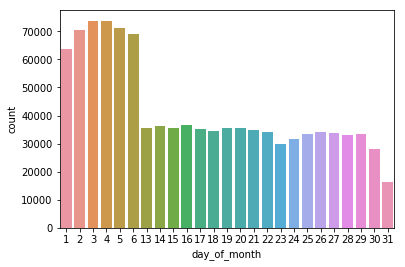

In [253]:
sns.countplot(x='day_of_month', data=taxi_mod3)

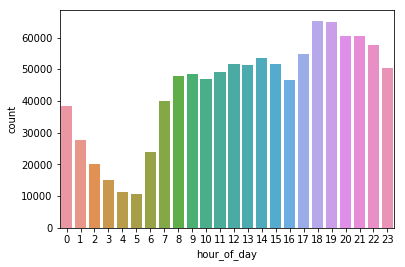

In [254]:
sns.countplot(x='hour_of_day', data=taxi_mod3)

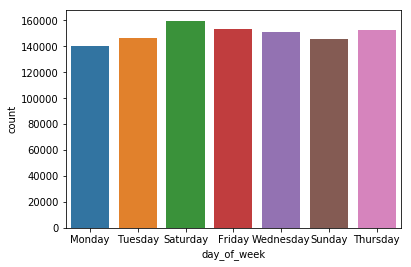

In [255]:
sns.countplot(x='day_of_week', data=taxi_mod3)

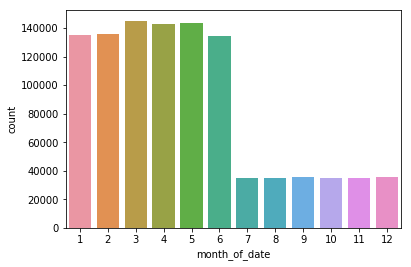

In [256]:
sns.countplot(x='month_of_date', data=taxi_mod3)

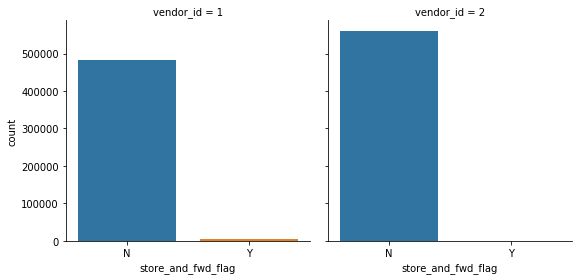

In [257]:
sns.factorplot(x='store_and_fwd_flag', col='vendor_id', kind='count', data=taxi_mod3);


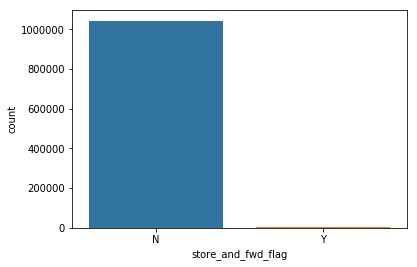

In [258]:
sns.countplot(x='store_and_fwd_flag', data=taxi_mod3)

In [259]:
taxi_mod4=taxi_mod3

In [260]:
taxi_mod4.max()

vendor_id                                    2
pickup_datetime            2016-12-06 23:59:00
dropoff_datetime              31-05-2016 23:59
passenger_count                              9
store_and_fwd_flag                           Y
trip_duration                          3526282
dropoff_date                        2016-12-06
dropoff_time                          23:59:00
pickup_date                         2016-12-06
pickup_time                           23:59:00
distance(in KM)                        1240.91
trip_duration(in hours)                979.523
SPEED(Km/Hr)                           6877.35
hour_of_day                                 23
month_of_date                               12
day_of_week                          Wednesday
day_of_month                                31
dtype: object

In [266]:
taxi_mod4=taxi_mod3.loc[(taxi_mod3['trip_duration'] <= 18000) & (taxi_mod3['distance(in KM)'] <= 200),['trip_duration','distance(in KM)'] ].reset_index(drop=True)


In [267]:
taxi_mod4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047076 entries, 0 to 1047075
Data columns (total 2 columns):
trip_duration      1047076 non-null int64
distance(in KM)    1047076 non-null float64
dtypes: float64(1), int64(1)
memory usage: 16.0 MB


In [268]:
taxi_mod4.head()

,trip_duration,distance(in KM)
0,455,1.498523
1,663,1.805510
2,2124,6.385107
3,429,1.485501
4,435,1.188591


In [271]:
taxi_mod5=taxi_mod4

Filtering the duration value greater than 1 hour for trip distance less than 1km
- non linear data points
- inconsistent data

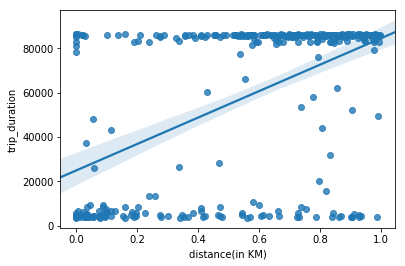

In [273]:
taxi_mod5=taxi_mod3.loc[(taxi_mod3['trip_duration'] >=3600 ) & (taxi_mod3['distance(in KM)'] <= 1),['trip_duration','distance(in KM)'] ].reset_index(drop=True)
sns.regplot(taxi_mod5['distance(in KM)'], taxi_mod5.trip_duration)
plt.show()

In [275]:
taxi_mod5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
trip_duration      337 non-null int64
distance(in KM)    337 non-null float64
dtypes: float64(1), int64(1)
memory usage: 5.3 KB


#taxi_mod5 = taxi_mod3['trip_duration','distance(in KM)']
taxi_mod5 = taxi_mod3[taxi_mod3.columns[[5,10]]]
taxi_mod5.info()

In [195]:
#taxi_mod6=taxi_mod5

Eliminating the duration value greater than 1 hour for trip distance less than 1km

In [277]:
taxi_mod6=pd.concat([taxi_mod4, taxi_mod5]).loc[taxi_mod4.index.symmetric_difference(taxi_mod5.index)]
taxi_mod6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046739 entries, 337 to 1047075
Data columns (total 2 columns):
trip_duration      1046739 non-null int64
distance(in KM)    1046739 non-null float64
dtypes: float64(1), int64(1)
memory usage: 24.0 MB


In [278]:
#taxi_mod7=taxi_mod3.loc[(taxi_mod6['trip_duration'] <= 12000) & (taxi_mod3['distance(in KM)'] <= 100),['trip_duration','distance(in KM)'] ].reset_index(drop=True)
#taxi_mod7.info()

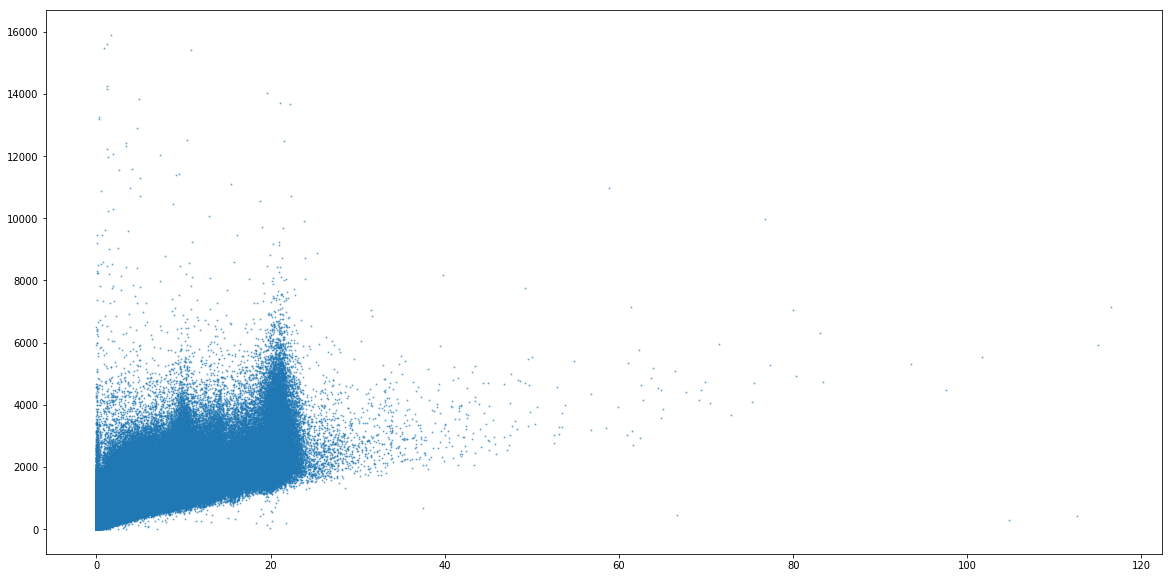

In [280]:
plt.figure(figsize=(20,10))
plt.scatter(taxi_mod6['distance(in KM)'],taxi_mod6['trip_duration'],s=1, alpha=0.5)

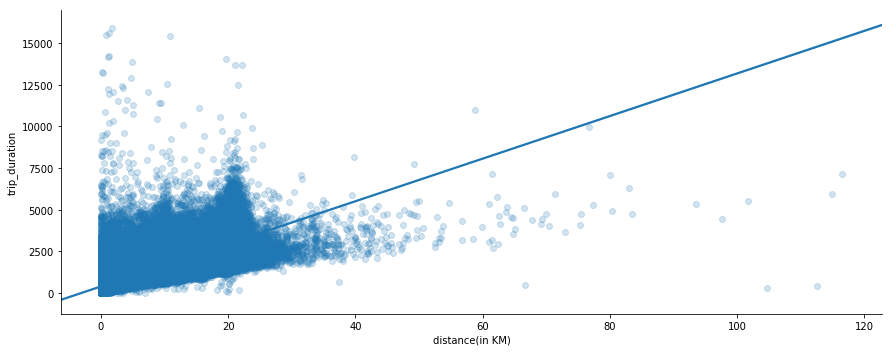

In [281]:
sns.lmplot(x='distance(in KM)', y='trip_duration', data=taxi_mod6, aspect=2.5, scatter_kws={'alpha':0.2})

Finding the correlation between Distance and Trip pickup Time

In [298]:
taxi_mod7 = taxi_mod3

In [328]:
taxi_mod7['day_of_week(num)'] = taxi_mod7['pickup_datetime'].dt.dayofweek

In [329]:
taxi_mod7.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,distance(in KM),trip_duration(in hours),SPEED(Km/Hr),hour_of_day,month_of_date,day_of_week,day_of_month,day_of_week(num)
0,2,2016-03-14 17:24:00,14-03-2016 17:32,1,N,455,2016-03-14,17:32:00,2016-03-14,17:24:00,1.498523,0.126389,11.856446,17,3,Monday,14,0
1,1,2016-12-06 00:43:00,12-06-2016 00:54,1,N,663,2016-12-06,00:54:00,2016-12-06,00:43:00,1.805510,0.184167,9.803675,0,12,Tuesday,6,1
2,2,2016-01-19 11:35:00,19-01-2016 12:10,1,N,2124,2016-01-19,12:10:00,2016-01-19,11:35:00,6.385107,0.590000,10.822216,11,1,Tuesday,19,1
3,2,2016-06-04 19:32:00,06-04-2016 19:39,1,N,429,2016-06-04,19:39:00,2016-06-04,19:32:00,1.485501,0.119167,12.465740,19,6,Saturday,4,5
4,2,2016-03-26 13:30:00,26-03-2016 13:38,1,N,435,2016-03-26,13:38:00,2016-03-26,13:30:00,1.188591,0.120833,9.836615,13,3,Saturday,26,5


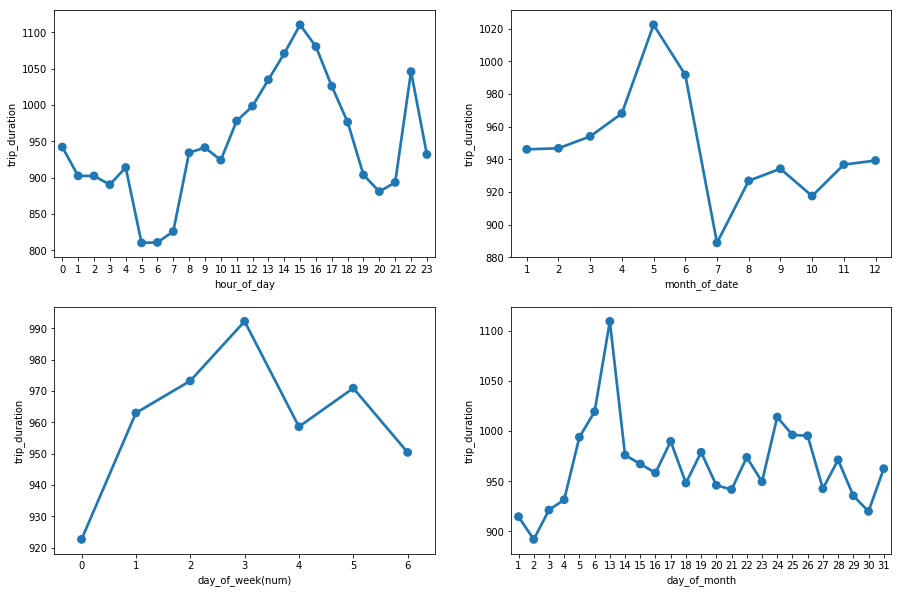

In [330]:
group1 = taxi_mod7.groupby('hour_of_day').trip_duration.mean()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.pointplot(group1.index, group1.values)
plt.ylabel('trip_duration')

group2 = taxi_mod7.groupby('month_of_date').trip_duration.mean()
plt.subplot(2,2,2)
sns.pointplot(group2.index, group2.values)
plt.ylabel('trip_duration')


group3 = taxi_mod7.groupby('day_of_week(num)').trip_duration.mean()
plt.subplot(2,2,3)
sns.pointplot(group3.index, group3.values)
plt.ylabel('trip_duration')

group4 = taxi_mod7.groupby('day_of_month').trip_duration.mean()
plt.subplot(2,2,4)
sns.pointplot(group4.index, group4.values)
plt.ylabel('trip_duration')
plt.show()

In [333]:
taxi_mod7 = taxi_mod7.rename(columns={'distance(in KM)': 'distance','trip_duration(in hours)':'trip_duration'})

In [334]:
taxi_mod7.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,distance,trip_duration,SPEED(Km/Hr),hour_of_day,month_of_date,day_of_week,day_of_month,day_of_week(num)
0,2,2016-03-14 17:24:00,14-03-2016 17:32,1,N,455,2016-03-14,17:32:00,2016-03-14,17:24:00,1.498523,0.126389,11.856446,17,3,Monday,14,0
1,1,2016-12-06 00:43:00,12-06-2016 00:54,1,N,663,2016-12-06,00:54:00,2016-12-06,00:43:00,1.805510,0.184167,9.803675,0,12,Tuesday,6,1
2,2,2016-01-19 11:35:00,19-01-2016 12:10,1,N,2124,2016-01-19,12:10:00,2016-01-19,11:35:00,6.385107,0.590000,10.822216,11,1,Tuesday,19,1
3,2,2016-06-04 19:32:00,06-04-2016 19:39,1,N,429,2016-06-04,19:39:00,2016-06-04,19:32:00,1.485501,0.119167,12.465740,19,6,Saturday,4,5
4,2,2016-03-26 13:30:00,26-03-2016 13:38,1,N,435,2016-03-26,13:38:00,2016-03-26,13:30:00,1.188591,0.120833,9.836615,13,3,Saturday,26,5


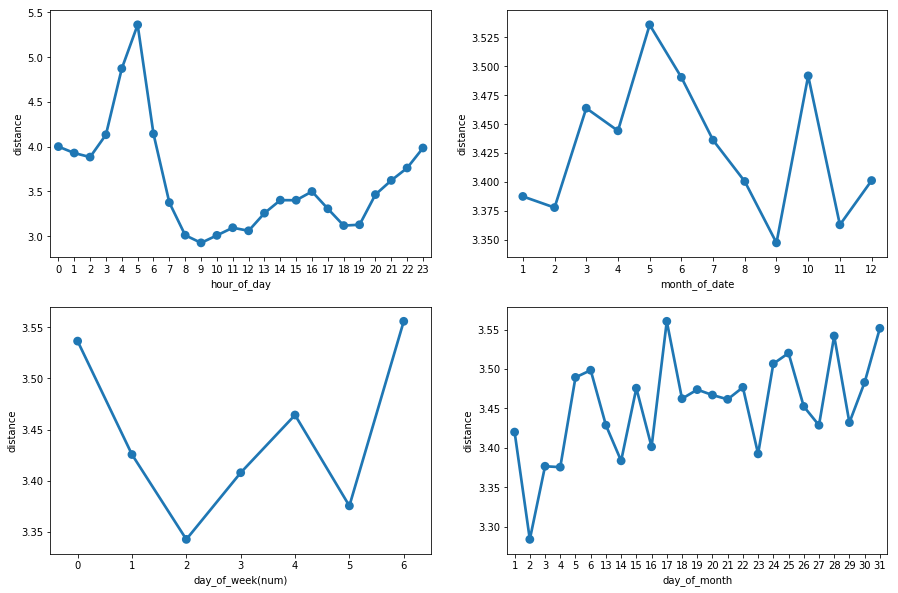

In [344]:
plt.figure(figsize=(15,10))
group5 = taxi_mod7.groupby('hour_of_day').distance.mean()
plt.subplot(2,2,1)
sns.pointplot(group5.index, group5.values)
plt.ylabel('distance')

group6 = taxi_mod7.groupby('month_of_date').distance.mean()
plt.subplot(2,2,2)
sns.pointplot(group6.index, group6.values)
plt.ylabel('distance')

group7 = taxi_mod7.groupby('day_of_week(num)').distance.mean()
plt.subplot(2,2,3)
sns.pointplot(group7.index, group7.values)
plt.ylabel('distance')

group8 = taxi_mod7.groupby('day_of_month').distance.mean()
plt.subplot(2,2,4)
sns.pointplot(group8.index, group8.values)
plt.ylabel('distance')
plt.show()



In [347]:
taxi_mod7.to_csv('B:/UPX docs/Machine Learning/Project_datasets/Project datasets modified/NYC Taxi Trip/NYC Taxi Trip/Taxi_new.csv')